In [1]:
import requests
import pandas as pd
import wbgapi as wb
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import json_normalize 

import wbgapi as wb #import World Bank API package


In [2]:
end = "http://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?date=2020&format=json"

r=requests.get(end)
json = r.json()
print(json)

[{'page': 1, 'pages': 6, 'per_page': 50, 'total': 266, 'sourceid': '2', 'sourcename': 'World Development Indicators', 'lastupdated': '2022-12-22'}, [{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'}, 'countryiso3code': 'AFE', 'date': '2020', 'value': 685112705, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'ZI', 'value': 'Africa Western and Central'}, 'countryiso3code': 'AFW', 'date': '2020', 'value': 466189102, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': '1A', 'value': 'Arab World'}, 'countryiso3code': 'ARB', 'date': '2020', 'value': 449228296, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'S3', 'value': 'Caribbean small states'}, 'countryiso3code': 'CSS',

In [3]:
wb_data = wb.data.DataFrame(["SL.UEM.TOTL.ZS","SM.POP.REFG.OR","BX.KLT.DINV.CD.WD","SP.POP.TOTL","SP.DYN.IMRT.IN","NY.GDP.MKTP.CD"], time = 2020, labels=True)

In [4]:
col_names = {'SL.UEM.TOTL.ZS': 'Unemployment Rate (%)',
        'SM.POP.REFG.OR': 'Refugee Population',
        'SP.POP.TOTL': 'Population',
        'NY.GDP.MKTP.CD': 'GDP',
        'SP.DYN.IMRT.IN': 'Infant Mortality Rate',
        'BX.KLT.DINV.CD.WD': 'Net FDI'}
wb_data.rename(columns=col_names,
          inplace=True)
wb_data

,Country,Net FDI,GDP,Unemployment Rate (%),Refugee Population,Infant Mortality Rate,Population
economy,,,,,,,
ZWE,Zimbabwe,1.503600e+08,2.150970e+10,5.351000,8575.0,37.900000,15669666.0
ZMB,Zambia,-1.727528e+08,1.811063e+10,12.848000,252.0,41.700000,18927715.0
YEM,"Yemen, Rep.",NaN,NaN,13.391000,32433.0,45.700000,32284046.0
PSE,West Bank and Gaza,7.974499e+07,1.553170e+10,25.889999,100153.0,14.200000,4803269.0
VIR,Virgin Islands (U.S.),NaN,4.204000e+09,13.545000,NaN,NaN,106290.0
...,...,...,...,...,...,...,...
CEB,Central Europe and the Baltics,2.148120e+11,1.664903e+12,4.374939,33806.0,3.926585,102180124.0
CSS,Caribbean small states,3.613635e+09,6.589681e+10,9.726657,5692.0,14.049952,7444768.0
ARB,Arab World,3.798689e+10,2.490805e+12,11.520235,8876924.0,25.779999,449228296.0


In [5]:
#Other data

freedom = pd.read_excel("/Users/kevnguyen/Library/CloudStorage/GoogleDrive-keng2413@colorado.edu/My Drive/CSCI5622/project/data/Country_and_Territory_Ratings_and_Statuses_FIW_1973-2022 .xlsx", 
                           skiprows=2, sheet_name=1, na_values = '-', usecols = 'A, EM:EO')

freedom_cols = ['Country', 'FH Political Rights Score', 'FH Civil Liberties Score', 'FH Status']
freedom.columns = freedom_cols

corruption = pd.read_excel('/Users/kevnguyen/Library/CloudStorage/GoogleDrive-keng2413@colorado.edu/My Drive/CSCI5622/project/data/CPI 2021 Full Data Set/CPI2021_GlobalResults&Trends.xlsx',
                          skiprows = 2, usecols ='A,B,D')

aid = pd.read_csv('/Users/kevnguyen/Library/CloudStorage/GoogleDrive-keng2413@colorado.edu/My Drive/CSCI5622/project/data/us_foreign_aid_country.csv')
                  
                  

Country Ratings, Statuses 
CPI 2021
CPI changes
CPI Timeseries 2012 - 2021


In [6]:
freedom


,Country,FH Political Rights Score,FH Civil Liberties Score,FH Status
0,Afghanistan,5.0,6.0,NF
1,Albania,3.0,3.0,PF
2,Algeria,6.0,5.0,NF
3,Andorra,1.0,1.0,F
4,Angola,6.0,5.0,NF
...,...,...,...,...
200,"Yemen, N.",NaN,NaN,NaN
201,"Yemen, S.",NaN,NaN,NaN
202,Yugoslavia,NaN,NaN,NaN
203,Zambia,4.0,4.0,PF


In [7]:
freedom.columns

Index(['Country', 'FH Political Rights Score', 'FH Civil Liberties Score',
       'FH Status'],
      dtype='object')

In [8]:
aid.dtypes

Country Code             object
Country Name             object
Region ID                 int64
Region Name              object
Income Group Acronym     object
Income Group Name        object
Transaction Type ID       int64
Transaction Type Name    object
Fiscal Year              object
current_amount            int64
constant_amount           int64
dtype: object

In [9]:
aid['Fiscal Year'] = aid['Fiscal Year'].str.replace(r'\D+', '', regex=True).astype('int')

In [10]:
aid_new = aid[aid['Fiscal Year'] == 2020].pivot(index='Country Code', columns='Transaction Type Name', values='current_amount')
aid_new = aid_new.drop(aid_new.columns[[0, 1, 3]], axis = 1)

In [11]:
df = corruption.merge(freedom, left_on = corruption.columns[0], right_on = freedom.columns[0]).merge(wb_data, left_on = 'ISO3', right_index = True).merge(aid_new, left_on='ISO3', right_index = True)

In [12]:
df.drop(df.columns[[3, 7]], axis=1, inplace = True)

In [13]:
df['Obligations'].median()

41248673.0

In [14]:
def applyFunc(s):
    if s <= 0:
        return 'No Aid'
    elif s < df['Obligations'].median():
        return 'Low Aid'
    else:
        return 'High Aid'
df['Aid Level'] = df['Obligations'].apply(applyFunc)

In [15]:
df

,Country / Territory,ISO3,CPI score 2021,FH Political Rights Score,FH Civil Liberties Score,FH Status,Net FDI,GDP,Unemployment Rate (%),Refugee Population,Infant Mortality Rate,Population,Obligations,Aid Level
0,Denmark,DNK,88,1.0,1.0,F,1.582722e+09,3.552224e+11,5.640,5.0,3.1,5831404.0,16986.0,Low Aid
1,Finland,FIN,88,1.0,1.0,F,-2.368877e+09,2.718918e+11,7.760,NaN,1.9,5529543.0,3386.0,Low Aid
2,New Zealand,NZL,88,1.0,1.0,F,4.057542e+09,2.117345e+11,4.590,35.0,3.9,5090200.0,-4707.0,No Aid
3,Norway,NOR,85,1.0,1.0,F,-4.102660e+09,3.621983e+11,4.420,5.0,1.8,5379475.0,21386.0,Low Aid
4,Singapore,SGP,85,4.0,4.0,PF,7.475051e+10,3.452959e+11,4.100,37.0,1.8,5685807.0,1728315.0,Low Aid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Yemen,YEM,16,7.0,6.0,NF,NaN,NaN,13.391,32433.0,45.7,32284046.0,556544348.0,High Aid
175,Venezuela,VEN,14,7.0,6.0,NF,-4.560000e+08,NaN,6.627,171112.0,21.1,28490453.0,163386454.0,High Aid
176,Somalia,SOM,13,7.0,7.0,NF,4.640000e+08,6.883000e+09,19.723,812356.0,72.7,16537016.0,689600465.0,High Aid
177,Syria,SYR,13,7.0,7.0,NF,NaN,1.107980e+10,10.257,6702910.0,18.4,20772595.0,837125251.0,High Aid


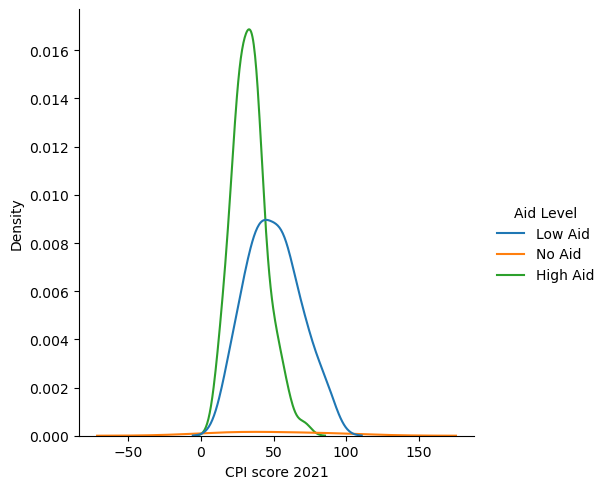

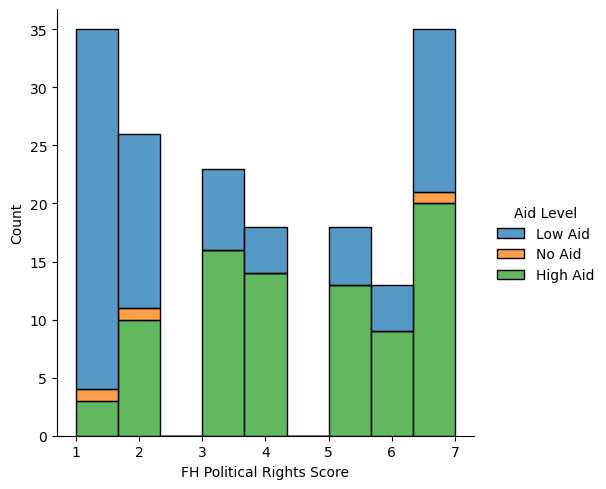

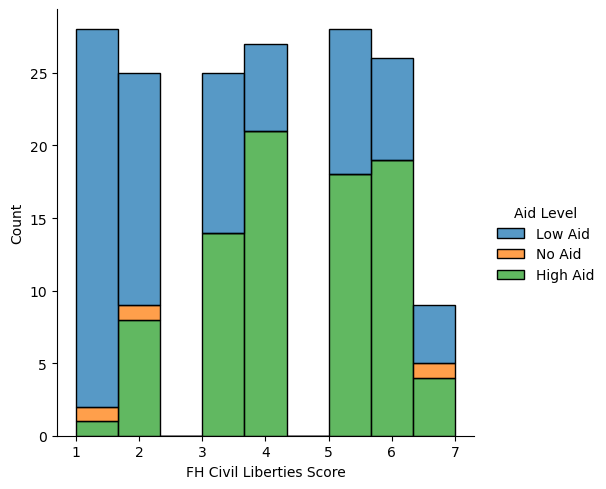

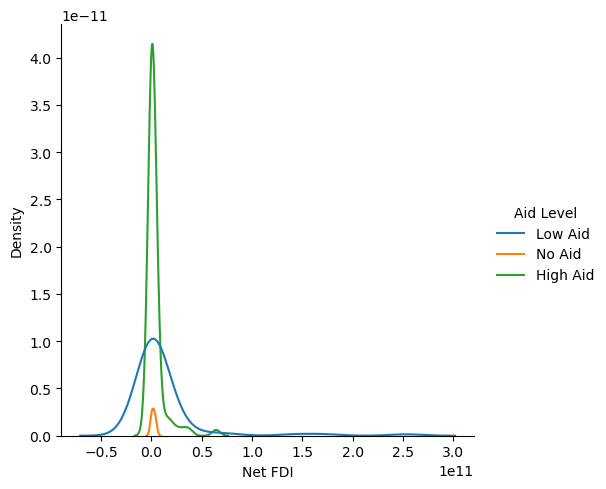

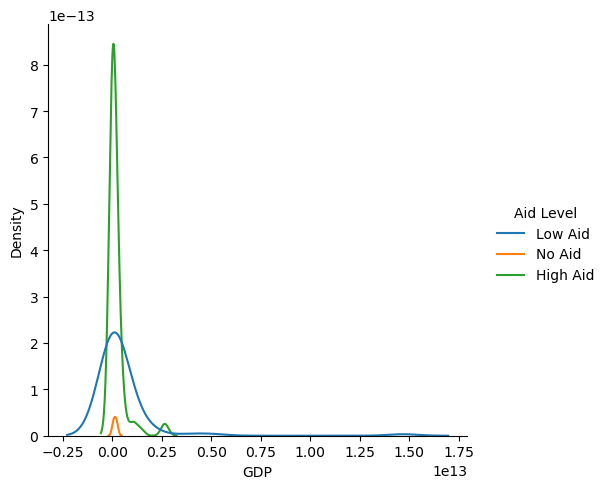

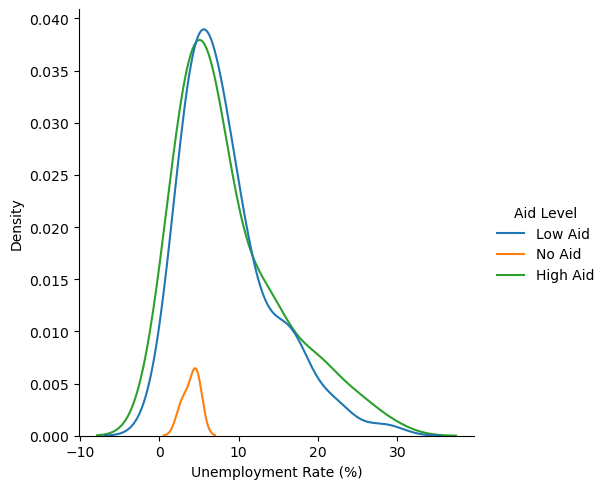

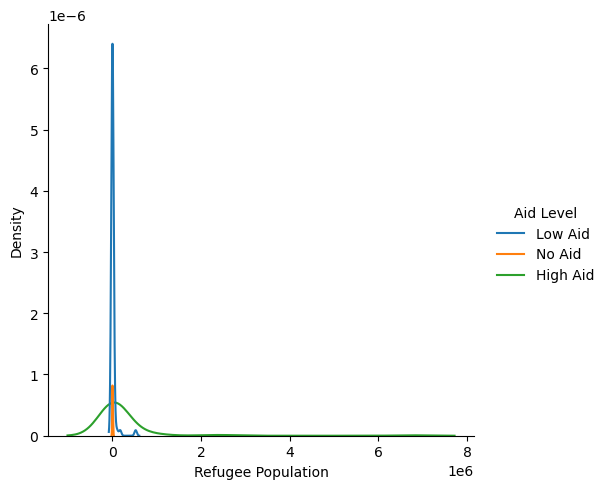

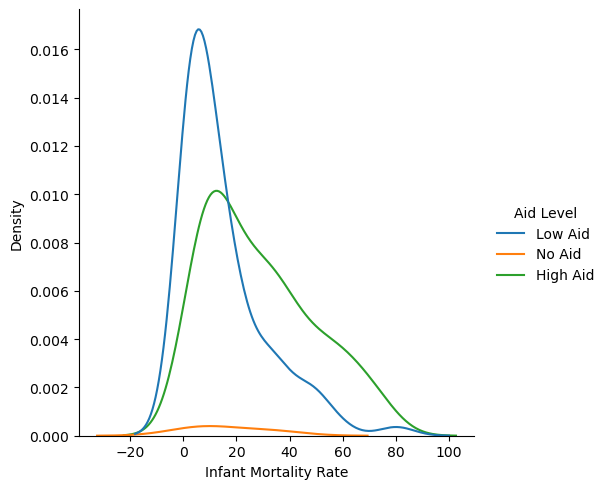

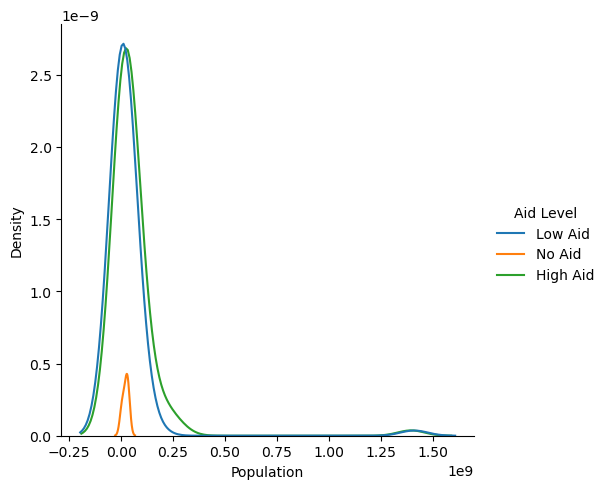

In [16]:
for i, col in enumerate(df.columns):
    if df.dtypes[i] != 'O' and i <  12:
        if(2 < i < 5):
            sns.displot(data = df, x = col, hue = 'Aid Level', multiple = 'stack')
        else : 
            sns.displot(data = df, x = col, hue = 'Aid Level', kind = 'kde')
        plt.savefig('fig_{ind:}.png'.format(ind = i))

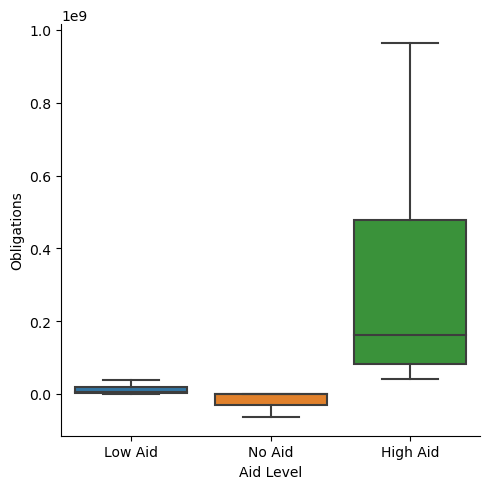

In [17]:
sns.catplot(data = df, x = 'Aid Level', y = 'Obligations', kind = 'box', showfliers = False) #boxplots
plt.savefig('fig_31.png')

In [18]:
df.dtypes

Country / Territory           object
ISO3                          object
CPI score 2021                 int64
FH Political Rights Score    float64
FH Civil Liberties Score     float64
FH Status                     object
Net FDI                      float64
GDP                          float64
Unemployment Rate (%)        float64
Refugee Population           float64
Infant Mortality Rate        float64
Population                   float64
Obligations                  float64
Aid Level                     object
dtype: object

In [19]:
df.shape

(168, 14)

In [20]:
df = df.fillna(df.mean())

/var/folders/4y/k_qw20h166938bpjh42hz8qm0000gn/T/ipykernel_14599/114435927.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [21]:
df

,Country / Territory,ISO3,CPI score 2021,FH Political Rights Score,FH Civil Liberties Score,FH Status,Net FDI,GDP,Unemployment Rate (%),Refugee Population,Infant Mortality Rate,Population,Obligations,Aid Level
0,Denmark,DNK,88,1.0,1.0,F,1.582722e+09,3.552224e+11,5.640,5.000000e+00,3.1,5831404.0,16986.0,Low Aid
1,Finland,FIN,88,1.0,1.0,F,-2.368877e+09,2.718918e+11,7.760,1.223080e+05,1.9,5529543.0,3386.0,Low Aid
2,New Zealand,NZL,88,1.0,1.0,F,4.057542e+09,2.117345e+11,4.590,3.500000e+01,3.9,5090200.0,-4707.0,No Aid
3,Norway,NOR,85,1.0,1.0,F,-4.102660e+09,3.621983e+11,4.420,5.000000e+00,1.8,5379475.0,21386.0,Low Aid
4,Singapore,SGP,85,4.0,4.0,PF,7.475051e+10,3.452959e+11,4.100,3.700000e+01,1.8,5685807.0,1728315.0,Low Aid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Yemen,YEM,16,7.0,6.0,NF,7.469824e+09,3.502181e+11,13.391,3.243300e+04,45.7,32284046.0,556544348.0,High Aid
175,Venezuela,VEN,14,7.0,6.0,NF,-4.560000e+08,3.502181e+11,6.627,1.711120e+05,21.1,28490453.0,163386454.0,High Aid
176,Somalia,SOM,13,7.0,7.0,NF,4.640000e+08,6.883000e+09,19.723,8.123560e+05,72.7,16537016.0,689600465.0,High Aid
177,Syria,SYR,13,7.0,7.0,NF,7.469824e+09,1.107980e+10,10.257,6.702910e+06,18.4,20772595.0,837125251.0,High Aid


In [22]:
df.to_csv('/Users/kevnguyen/Library/CloudStorage/GoogleDrive-keng2413@colorado.edu/My Drive/CSCI5622/project/data/final_clean_data.csv')